In [119]:
#######################IMPORT_LIBRARIES######################
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import tree
import random
import pylab as pl
from sklearn.tree import DecisionTreeClassifier #import the DT classifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

In [120]:
#Import dataset
IBM_dataset = pd.read_csv('IBM.csv')

In [121]:
#Show the first 4 rows from the dataset
IBM_dataset.head(4)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0


In [122]:
#Show the columns of the dataset
IBM_dataset.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [123]:
#Show information about the dataset
#Notice the data types --> int64 vs object
IBM_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [124]:
#Check if any of the attributes are empty
IBM_dataset.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [125]:
#Find the data entries of the object data
IBM_dataset['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [126]:
IBM_dataset['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [127]:
IBM_dataset['Department'].unique()                  

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [128]:
IBM_dataset['EducationField'].unique()                                

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [129]:
IBM_dataset['JobRole'].unique()                                                     

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [130]:
IBM_dataset['MaritalStatus'].unique()                                                            

array(['Single', 'Married', 'Divorced'], dtype=object)

In [131]:
IBM_dataset['Over18'].unique()                                                                         

array(['Y'], dtype=object)

In [132]:
IBM_dataset['Gender'].unique()                                                                         

array(['Female', 'Male'], dtype=object)

In [133]:
IBM_dataset['OverTime'].unique()                                                                         

array(['Yes', 'No'], dtype=object)

In [134]:
IBM_dataset['EmployeeCount'].unique()                                                                         

array([1], dtype=int64)

In [135]:
IBM_dataset['StandardHours'].unique()                                                                         

array([80], dtype=int64)

In [136]:
#Check the shape of the dataset
IBM_dataset.shape

(1470, 35)

In [137]:
#Drop duplicates and check the shapre of the dataset again
IBM_dataset=IBM_dataset.drop_duplicates()
IBM_dataset.shape

(1470, 35)

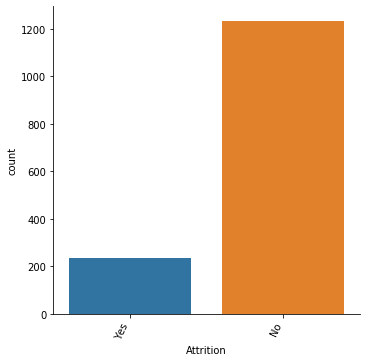

In [138]:
#Plot the Attrition count, notice the dataset is unbalanced
chart = sns.catplot(
    data=IBM_dataset,
    kind='count',
    x='Attrition'
)
chart.set_xticklabels(rotation=65, horizontalalignment='right')

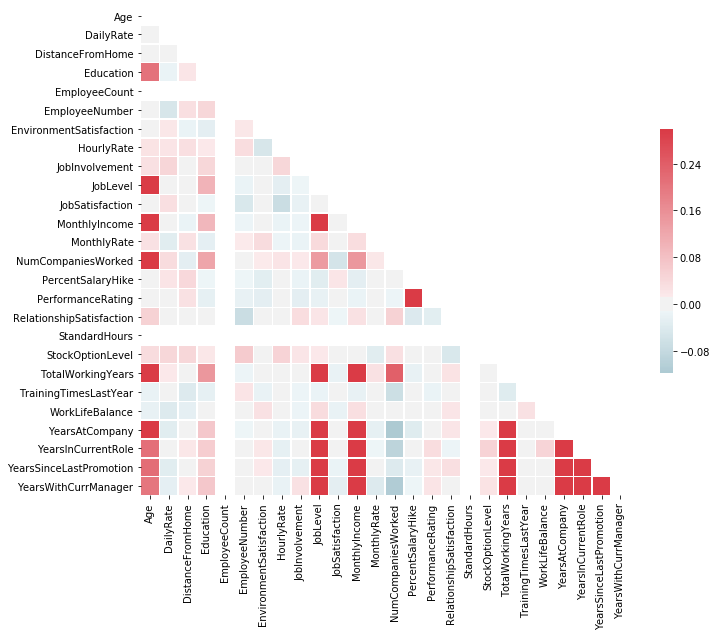

In [139]:
# Show the correlation between the various factors

# Compute the correlation matrix
corr = IBM_dataset.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [140]:
#Dropping the useless columns
IBM_dataset2 = IBM_dataset.drop(["Over18"], axis=1)
IBM_dataset2 = IBM_dataset2.drop(["EmployeeCount"], axis=1)
IBM_dataset2 = IBM_dataset2.drop(["StandardHours"], axis=1)
IBM_dataset2 = IBM_dataset2.drop(["EmployeeNumber"], axis=1)
IBM_dataset2 = IBM_dataset2.drop(["Attrition"], axis=1)
dflabel = IBM_dataset[['Attrition']]
#Re-inserting the Attrition Label to the end of the dataset
IBM_dataset2.insert(len(IBM_dataset2.columns),"Attrition",dflabel)
IBM_dataset2

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,...,1,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,...,4,1,10,3,3,10,7,1,7,No
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,...,2,0,7,3,3,0,0,0,0,Yes
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,...,3,0,8,3,3,8,7,3,0,No
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,...,4,1,6,3,3,2,2,2,2,No
5,32,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,4,Male,79,...,3,0,8,2,2,7,7,3,6,No
6,59,Travel_Rarely,1324,Research & Development,3,3,Medical,3,Female,81,...,1,3,12,3,2,1,0,0,0,No
7,30,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,4,Male,67,...,2,1,1,2,3,1,0,0,0,No
8,38,Travel_Frequently,216,Research & Development,23,3,Life Sciences,4,Male,44,...,2,0,10,2,3,9,7,1,8,No
9,36,Travel_Rarely,1299,Research & Development,27,3,Medical,3,Male,94,...,2,2,17,3,2,7,7,7,7,No


In [141]:
#Changing the categorical data to numerical data

IBM_dataset2.Gender = [1 if each == "Male" else 0 for each in IBM_dataset2.Gender]

columns_to_convert = ['OverTime'
#                       ,'Attrition'
                     ]
for item in columns_to_convert:
 IBM_dataset2[item] = [1 if each == "Yes" else 0 
#                        if each == "No" else -1
for each in IBM_dataset2[item]]

IBM_dataset2.BusinessTravel = [0 if each == "Non-Travel"  else 1 if each=="Travel_Rarely"
                               else 2 for each in IBM_dataset2.BusinessTravel]

IBM_dataset2.Department = [0 if each == "Sales"  else 1 if each=="Research & Development"
                           else 2 
#                            if each == "Human Resources" 
                           for each in IBM_dataset2.Department]

IBM_dataset2.EducationField = [0 if each == "Life Sciences"  else 1 if each=="Medical" 
                                else 2 if each=="Marketing"
                                else 3 if each=="Technical Degree"
#                                 else 4 if each=="Human Resources"
                               else 4 for each in IBM_dataset2.EducationField]

IBM_dataset2.JobRole = [0 if each == "Sales Executive"  else 1 if each=="Research Scientist" 
                        else 2 if each=="Laboratory Technician"
                        else 3 if each=="Manufacturing Director"
                        else 4 if each=="Healthcare Representative"
                        else 5 if each=="Manager"
                        else 6 if each=="Sales Representative"
                        else 7 if each=="Research Director"
#                         else 1 if each=="Human Resources"
                        else 8 for each in IBM_dataset2.JobRole]

IBM_dataset2.MaritalStatus = [0 if each == "Single"  else 1 if each=="Married" 
                              #divorced
                              else 2 for each in IBM_dataset2.MaritalStatus]

IBM_dataset2.head()


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,1,1102,0,1,2,0,2,0,94,...,1,0,8,0,1,6,4,0,5,Yes
1,49,2,279,1,8,1,0,3,1,61,...,4,1,10,3,3,10,7,1,7,No
2,37,1,1373,1,2,2,4,4,1,92,...,2,0,7,3,3,0,0,0,0,Yes
3,33,2,1392,1,3,4,0,4,0,56,...,3,0,8,3,3,8,7,3,0,No
4,27,1,591,1,2,1,1,1,1,40,...,4,1,6,3,3,2,2,2,2,No


In [142]:
len(IBM_dataset2.columns)

31

In [143]:
IBM_dataset2.iloc[:,[17,19]]


,NumCompaniesWorked,PercentSalaryHike
0,8,11
1,1,23
2,6,15
3,1,11
4,9,12
5,0,13
6,4,20
7,1,22
8,0,21
9,6,13


In [144]:
# Create two pandas arrays -- one for X and one for Y to get ready for training

# convert the array into a numpy array
arr = IBM_dataset2.to_numpy()

# separate X and Y
X = arr[:,0:30]
Y = arr[:,30]

In [145]:
X

array([[41, 1, 1102, ..., 4, 0, 5],
       [49, 2, 279, ..., 7, 1, 7],
       [37, 1, 1373, ..., 0, 0, 0],
       ...,
       [27, 1, 155, ..., 2, 0, 3],
       [49, 2, 1023, ..., 6, 0, 8],
       [34, 1, 628, ..., 3, 1, 2]], dtype=object)

In [146]:
# X = (IBM_dataset2 - np.min(IBM_dataset2)) / (np.max(IBM_dataset2) - np.min(IBM_dataset2)).values
# X

In [147]:
Y

array(['Yes', 'No', 'Yes', ..., 'No', 'No', 'No'], dtype=object)

In [148]:
### Split arrays or matrices into random train and test subsets 80:20
features_subset1, features_subset2, labels_subset1, labels_subset2 = train_test_split(X, Y, test_size=0.20)

In [149]:
### print the subsets, for visualization purposes
print('Features for subset1 are: ', features_subset1)
print('Features for subset2 are: ', features_subset2)

Features for subset1 are:  [[29 2 1404 ... 1 0 2]
 [35 1 1402 ... 3 4 2]
 [31 2 1060 ... 2 2 2]
 ...
 [34 1 470 ... 9 5 9]
 [39 2 443 ... 3 0 7]
 [41 1 1102 ... 4 0 5]]
Features for subset2 are:  [[55 1 111 ... 0 1 0]
 [37 1 370 ... 3 0 8]
 [39 1 1383 ... 4 0 4]
 ...
 [30 1 852 ... 8 3 0]
 [45 1 1005 ... 6 8 6]
 [28 0 280 ... 2 2 2]]


In [174]:
### import the sklearn module for Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

### create the classifier
clf = DecisionTreeClassifier(max_depth=4,min_samples_split=96,min_samples_leaf =29, max_leaf_nodes = 26)

### fit (train) the classifier on the training features and labels
clf.fit(features_subset1, labels_subset1) 

### Predict the labels for features_part2 and print them
# print('Predicion result on subset2 is: ', clf.predict(features_subset2))

### Find the prediction accuracy of the model 
# print('Predicion accuracy is : ', clf.score(features_subset2, labels_subset2))

scores = cross_validate(estimator=clf, X=features_subset1, y=labels_subset1, cv=10,return_train_score=True)

# print('Predicion accuracy is: ', clf.score(features_subset2, labels_subset2))

print("Prediction accuracy with 10-fold cross-validation is and default attributes", scores['test_score'].mean())




Prediction accuracy with 10-fold cross-validation is and default attributes 0.8426553672316384


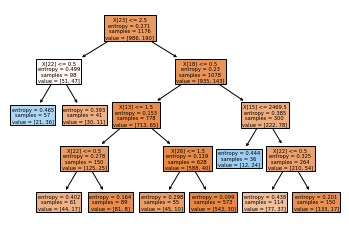

In [190]:
#Plotting the tree
plt.figure()
tree.plot_tree(clf,filled=True)  
plt.savefig('tree.jpg',format='jpg',bbox_inches = "tight")

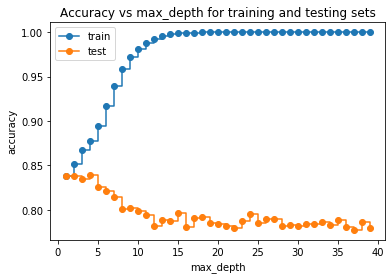

Best Predicion accuracy is:  0.8392872664059106  when the max_depth is 4


<Figure size 432x288 with 0 Axes>

In [192]:
### create the classifier
train_scores = []
test_scores = []

for max_depth in range(1,40):
    clf = DecisionTreeClassifier( max_depth=max_depth)
    clf.fit(features_subset1, labels_subset1)
    scores = cross_validate(estimator=clf, X=features_subset1, y=labels_subset1, cv=10,return_train_score=True)
    train_scores.append(scores['train_score'].mean())
    test_scores.append(scores['test_score'].mean())

fig, ax = plt.subplots()
ax.set_xlabel("max_depth")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs max_depth for training and testing sets")
x= np.arange(1,40)

ax.plot(x, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(x, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()
plt.savefig('max_depth.jpg',format='jpg',bbox_inches = "tight")
### Find the best prediction accuracy of the model with best max_depth
print('Best Predicion accuracy is: ', max(test_scores)," when the max_depth is",test_scores.index(max(test_scores))+1)

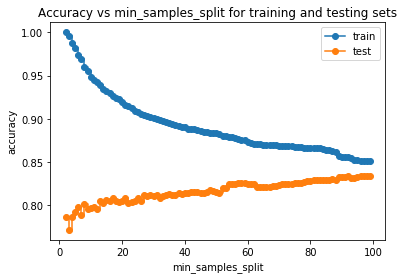

Best Predicion accuracy is:  0.8341735477328698  when the min_samples_split is 95


In [162]:
### create the classifier
train_scores = []
test_scores = []

for min_samples_split in range(2,100):
    clf = DecisionTreeClassifier( min_samples_split=min_samples_split)
    clf.fit(features_subset1, labels_subset1)
    scores = cross_validate(estimator=clf, X=features_subset1, y=labels_subset1, cv=10,return_train_score=True)
    train_scores.append(scores['train_score'].mean())
    test_scores.append(scores['test_score'].mean())

fig, ax = plt.subplots()
ax.set_xlabel("min_samples_split")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs min_samples_split for training and testing sets")
x= np.arange(2,100)

ax.plot(x, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(x, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

### Find the best prediction accuracy of the model with best min_samples_split
print('Best Predicion accuracy is: ', max(test_scores)," when the min_samples_split is",test_scores.index(max(test_scores))+2)


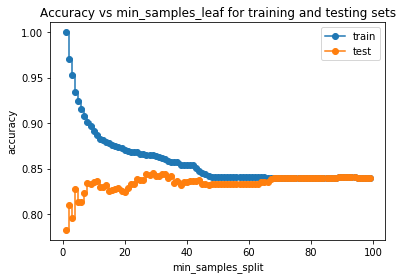

Best Predicion accuracy is:  0.8452267130233233  when the min_samples_leaf is 29


In [163]:
### create the classifier
train_scores = []
test_scores = []
for min_samples_leaf in range(1,100):
    clf = DecisionTreeClassifier( min_samples_leaf=min_samples_leaf)
    clf.fit(features_subset1, labels_subset1)
    scores = cross_validate(estimator=clf, X=features_subset1, y=labels_subset1, cv=10,return_train_score=True)
    train_scores.append(scores['train_score'].mean())
    test_scores.append(scores['test_score'].mean())

fig, ax = plt.subplots()
ax.set_xlabel("min_samples_split")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs min_samples_leaf for training and testing sets")
x= np.arange(1,100)

ax.plot(x, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(x, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()


### Find the best prediction accuracy of the model with best min_samples_split
print('Best Predicion accuracy is: ', max(test_scores)," when the min_samples_leaf is",test_scores.index(max(test_scores))+1)



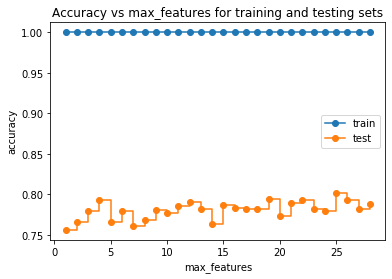

Best Predicion accuracy is:  0.8018759959437926  when the max_features are 25


In [167]:
train_scores = []
test_scores = []

for max_features in range(1,29):
    clf = DecisionTreeClassifier( max_features=max_features)
    clf.fit(features_subset1, labels_subset1)
    scores = cross_validate(estimator=clf, X=features_subset1, y=labels_subset1, cv=10,return_train_score=True)
    train_scores.append(scores['train_score'].mean())
    test_scores.append(scores['test_score'].mean())

fig, ax = plt.subplots()
ax.set_xlabel("max_features")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs max_features for training and testing sets")
x= np.arange(1,29)

ax.plot(x, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(x, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

### Find the best prediction accuracy of the model with best min_samples_split
print('Best Predicion accuracy is: ', max(test_scores)," when the max_features are",test_scores.index(max(test_scores))+1)




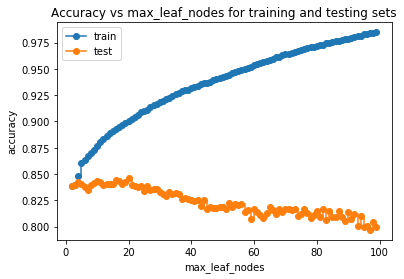

Best Predicion accuracy is:  0.8018759959437926  when the max_leaf_nodes are 26


In [168]:
train_score = []
test_score = []

for max_leaf_nodes in range(2,100):
    clf = DecisionTreeClassifier( max_leaf_nodes=max_leaf_nodes)
    clf.fit(features_subset1, labels_subset1)
    scores = cross_validate(estimator=clf, X=features_subset1, y=labels_subset1, cv=10,return_train_score=True)
    train_score.append(scores['train_score'].mean())
    test_score.append(scores['test_score'].mean())

fig, ax = plt.subplots()
ax.set_xlabel("max_leaf_nodes")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs max_leaf_nodes for training and testing sets")
x= np.arange(2,100)

ax.plot(x, train_score, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(x, test_score, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

### Find the best prediction accuracy of the model with best min_samples_split
print('Best Predicion accuracy is: ', max(test_scores)," when the max_leaf_nodes are",test_scores.index(max(test_scores))+2)




In [94]:

### create the classifier
clf = DecisionTreeClassifier(class_weight='balanced')

# ccp_alpha = 0.1

### fit (train) the classifier on the training features and labels
clf.fit(features_subset1, labels_subset1) 

### Predict the labels for features_part2 and print them
# print('Predicion result on subset2 is: ', clf.predict(features_subset2))

### Find the prediction accuracy of the model 
print('Predicion accuracy is: ', clf.score(features_subset2, labels_subset2))

# from sklearn.model_selection import cross_validate

# x_train,x_test,y_train,y_test = cross_validation.train_test_split(x,y,test_size=0.4,random_state=0)
# clf = tree.DecisionTreeClassifier(max_depth=100)
# Perform 7-fold cross validation 
# clf.fit(features_subset1, labels_subset1) 
scores = cross_validate(estimator=clf, X=features_subset1, y=labels_subset1, cv=7,return_train_score=True)

print('Predicion accuracy is: ', clf.score(features_subset2, labels_subset2))

print("10-fold cross-validation")

print(scores['test_score'].mean())



Predicion accuracy is:  0.7925170068027211
Predicion accuracy is:  0.7925170068027211
10-fold cross-validation
0.7950488950850865


In [43]:
clfs = []
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(features_subset1, labels_subset1)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(features_subset1, labels_subset1)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

train_scores = [clf.score(features_subset1, labels_subset1) for clf in clfs]
test_scores = [clf.score(features_subset2, labels_subset2) for clf in clfs]


# features_subset1, features_subset2, labels_subset1, labels_subset2 = train_test_split(X, Y, test_size=0.20)
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

AttributeError: 'DecisionTreeClassifier' object has no attribute 'cost_complexity_pruning_path'